In [1]:
!wget -nc http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip

--2023-07-18 06:26:00--  http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.39.48, 142.251.39.16, 142.250.201.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.39.48|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2638744 (2.5M) [application/zip]
Saving to: 'spa-eng.zip'

     0K .......... .......... .......... .......... ..........  1%  250K 10s
    50K .......... .......... .......... .......... ..........  3%  372K 8s
   100K .......... .......... .......... .......... ..........  5% 1.02M 6s
   150K .......... .......... .......... .......... ..........  7%  958K 5s
   200K .......... .......... .......... .......... ..........  9% 1.15M 4s
   250K .......... .......... .......... .......... .......... 11% 1.57M 4s
   300K .......... .......... .......... .......... .......... 13% 1.55M 3s
   350K .......... .......... .......... ..........

In [3]:
!unzip -nq spa-eng.zip

In [4]:
!ls spa-eng

_about.txt
spa.txt


In [5]:
!head spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	VÃ¡yase.
Hi.	Hola.
Run!	Â¡Corre!
Run.	Corred.
Who?	Â¿QuiÃ©n?
Fire!	Â¡Fuego!
Fire!	Â¡Incendio!


In [1]:
eng2spa = {}
for line in open('spa-eng/spa.txt', encoding='utf-8'):
    line = line.rstrip()
    eng, spa = line.split("\t")
    if eng not in eng2spa:
        eng2spa[eng] = []
    eng2spa[eng].append(spa)

In [2]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [3]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [4]:
from nltk.tokenize import RegexpTokenizer

In [5]:
tokenizer = RegexpTokenizer(r'\w+')

In [6]:
tokenizer.tokenize('¿Dónde estoy?'.lower())

['dónde', 'estoy']

In [7]:
tokens = tokenizer.tokenize('¿Dónde estoy?'.lower())
sentence_bleu([tokens], tokens)

C:\Users\Andrei\anaconda3\envs\torchenv\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\Andrei\anaconda3\envs\torchenv\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.491668146240062e-154

In [8]:
sentence_bleu([['hi']], ['hi'])

C:\Users\Andrei\anaconda3\envs\torchenv\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


1.821831989445342e-231

In [9]:
smoother = SmoothingFunction()
sentence_bleu(['hi'], 'hi', smoothing_function=smoother.method4)

3.1145782937548705

In [10]:
sentence_bleu(['hi there'.split()], 'hi there'.split())

1.491668146240062e-154

In [11]:
eng2spa_tokens = {}
for eng, spa_list in eng2spa.items():
    spa_list_tokens = []
    for text in spa_list:
        tokens = tokenizer.tokenize(text.lower())
        spa_list_tokens.append(tokens)
    eng2spa_tokens[eng] = spa_list_tokens

In [12]:
from transformers import pipeline

translator = pipeline("translation", model='Helsinki-NLP/opus-mt-en-es')

C:\Users\Andrei\anaconda3\envs\torchenv\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Andrei\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


C:\Users\Andrei\anaconda3\envs\torchenv\lib\site-packages\transformers\models\marian\tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [13]:
translator('I like eggs and ham')

[{'translation_text': 'Me gustan los huevos y el jamón.'}]

In [14]:
eng_phrases = list(eng2spa.keys())
len(eng_phrases)

102904

In [15]:
eng_phrases_subset = eng_phrases[20_000:21_000]

In [16]:
translations = translator(eng_phrases_subset)

In [17]:
translations[0]

{'translation_text': 'Tom está en el jardín.'}

In [21]:
eng_phrases_subset

['Tom is in the garden.',
 'Tom is in the shower.',
 'Tom is just like you.',
 'Tom is looking at us.',
 'Tom is my only child.',
 'Tom is never on time.',
 'Tom is not a student.',
 'Tom is not religious.',
 'Tom is now in prison.',
 'Tom is old-fashioned.',
 'Tom is overemotional.',
 'Tom is playing piano.',
 'Tom is proud of Mary.',
 'Tom is quite popular.',
 'Tom is scolding Mary.',
 'Tom is seeking a job.',
 'Tom is self employed.',
 'Tom is sending a fax.',
 'Tom is short and fat.',
 'Tom is still baffled.',
 'Tom is still sitting.',
 'Tom is still waiting.',
 'Tom is still worried.',
 'Tom is studying hard.',
 'Tom is taking a rest.',
 'Tom is the defendant.',
 'Tom is the real hero.',
 'Tom is very handsome.',
 'Tom is very reliable.',
 'Tom is very romantic.',
 'Tom is very thorough.',
 'Tom is watching golf.',
 'Tom is working there.',
 "Tom isn't a Canadian.",
 "Tom isn't a stranger.",
 "Tom isn't lonely now.",
 "Tom isn't optimistic.",
 "Tom isn't that young.",
 "Tom isn't 

In [18]:
scores = []
for eng, pred in zip(eng_phrases_subset, translations):
    matches = eng2spa_tokens[eng]

    spa_pred = tokenizer.tokenize(pred['translation_text'].lower())

    score = sentence_bleu(matches, spa_pred)
    scores.append(score)

C:\Users\Andrei\anaconda3\envs\torchenv\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\Andrei\anaconda3\envs\torchenv\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\Andrei\anaconda3\envs\torchenv\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-g

(array([649.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   1.,   2.,   2.,   3.,   0.,   0.,   0.,   0.,
         16.,   0.,   0.,   0.,   3.,   7.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 313.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

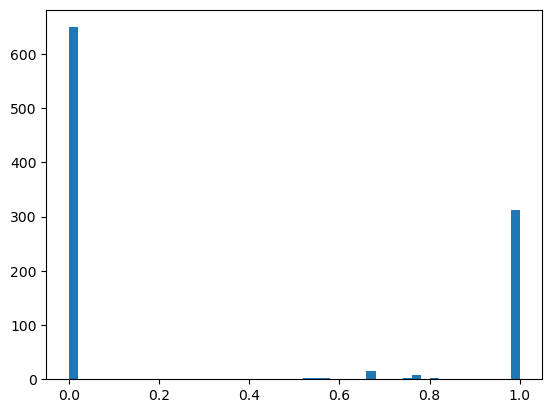

In [19]:
import matplotlib.pyplot as plt
plt.hist(scores, bins=50)

In [20]:
import numpy as np
np.mean(scores)

0.3383504014386889

In [23]:
np.random.seed(1)

def print_random_translation():
    i = np.random.choice(len(eng_phrases_subset))
    eng = eng_phrases_subset[i]
    print("EN: ", eng)

    translation = translations[i]['translation_text']
    print("ES Translation: ", translation)

    matches = eng2spa[eng]
    print("Matches: ", matches)

In [24]:
print_random_translation()

EN:  Tom isn't that young.
ES Translation:  Tom no es tan joven.
Matches:  ['Tom no es tan joven.']
